In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Data/main_data/air_quality_index.csv")
data.head()

,T,TM,Tm,H,VV,V,VM,PM2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1104 non-null   float64
 1   TM      1104 non-null   float64
 2   Tm      1104 non-null   float64
 3   H       1104 non-null   float64
 4   VV      1104 non-null   float64
 5   V       1104 non-null   float64
 6   VM      1104 non-null   float64
 7   PM2.5   1104 non-null   float64
dtypes: float64(8)
memory usage: 69.1 KB


# Linear Regression

In [4]:
X=data.drop(columns='PM2.5')
y=data['PM2.5']

[]

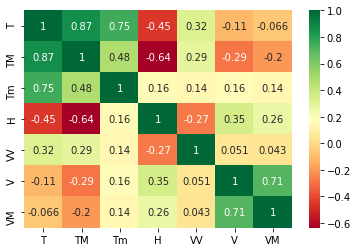

In [5]:
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')
plt.plot()

### high Multicolinearity 
- drop TM,Tm,VM column

In [6]:
# X.drop(columns=['TM','Tm','VM'],inplace=True)

## Feature Selection

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [9]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
lr.score(X_train,y_train)

0.3556542268778353

In [11]:
lr.score(X_test,y_test)

0.36767191976882985

In [12]:
pd.DataFrame(lr.coef_,X.columns,columns=['Coeficient'])

,Coeficient
T,-20.829782
TM,-0.060507
Tm,0.352599
H,-2.143982
VV,-5.482708
V,-7.058361
VM,-0.509326


In [13]:
y_pred=lr.predict(X_test)

[]

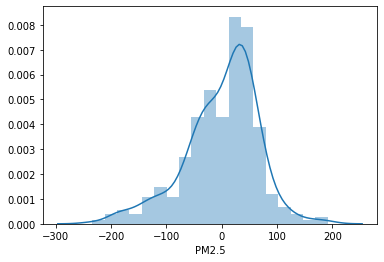

In [14]:
sns.distplot(y_pred-y_test)
plt.plot()

[]

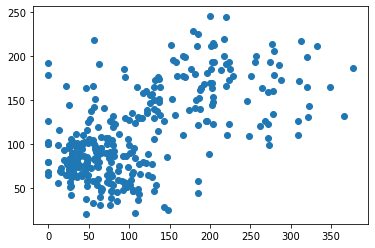

In [15]:
plt.scatter(y_test,y_pred)
plt.plot()

### Metrics

In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [17]:
# MAE
mean_absolute_error(y_test,y_pred)

51.54320487640963

In [18]:
# MSE
mean_squared_error(y_test,y_pred)

4387.756658130083

In [19]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

66.24014385650203

## Save Model

In [20]:
import pickle

In [21]:
with open('Models/Linear_Regression.pkl','wb') as f:
    pickle.dump(lr,f)